In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Sample data
data = {
    'bedrooms': [3, 2, 4, np.nan, 3],
    'square_footage': [2000, 1500, 2500, 1800, 1600],
    'has_garage': ['yes', 'no', 'yes', 'yes', 'no'],
    'price': [500000, 400000, 600000, 550000, 450000]
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)


Original DataFrame:
   bedrooms  square_footage has_garage   price
0       3.0            2000        yes  500000
1       2.0            1500         no  400000
2       4.0            2500        yes  600000
3       NaN            1800        yes  550000
4       3.0            1600         no  450000


In [12]:
# Filling missing values with the mean of the column
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())
# Encoding 'has_garage' column to numerical values
df['has_garage'] = df['has_garage'].map({'yes': 1, 'no': 0})


In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['bedrooms', 'square_footage']] = scaler.fit_transform(df[['bedrooms', 'square_footage']])
print("Preprocessed DataFrame:")
print(df)


Preprocessed DataFrame:
   bedrooms  square_footage  has_garage   price
0  0.000000        0.338600           1  500000
1 -1.581139       -1.072232           0  400000
2  1.581139        1.749431           1  600000
3  0.000000       -0.225733           1  550000
4  0.000000       -0.790066           0  450000


In [14]:
from sklearn.model_selection import train_test_split

X = df[['bedrooms', 'square_footage', 'has_garage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
from sklearn.linear_model import LinearRegression

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [6]:
# Making predictions on the test set
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)


Predicted values: [250000.]
Actual values: [400000]


In [7]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")


# Here is no enough data for evaluation so we will get warning.

Mean Absolute Error: 150000.0
Mean Squared Error: 22500000000.0
R-squared: nan


c:\Users\L E N O V O\machine-learning\machinelearn\Lib\site-packages\sklearn\metrics\_regression.py:1211: UndefinedMetricWarning: R^2 score is not well-defined with less than two samples.
  warnings.warn(msg, UndefinedMetricWarning)


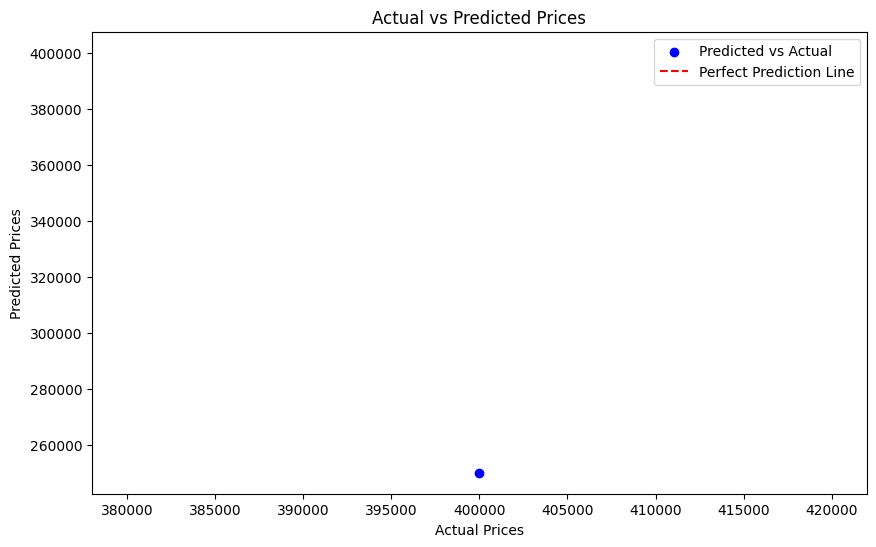

In [8]:
# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', label='Predicted vs Actual')
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--', label='Perfect Prediction Line')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()

Regression models learn the relationship between features (independent variables) and the target (dependent variable). It helps you model this relationship based on historical data.
# Linear Regression Equation
The linear regression equation is:
y = b<sub>0 </sub>+ b<sub>1</sub>x<sub>1</sub> + b<sub>2</sub>x<sub>2</sub> + ...... + b<sub>n</sub>x<sub>n</sub>
where, 
- y is the dependent variable (target).
- b<sub>0 is the intercept.
- b<sub>1</sub> + b<sub>2</sub> + ...... + b<sub>n</sub> are the coefficients.
- x<sub>1</sub> + x<sub>2</sub> + ...... + x<sub>n</sub> are the independent variables (features).

The goal of linear regression is to find the values of b<sub>0 </sub>, b<sub>1</sub>, b<sub>2</sub>, ...... , b<sub>n</sub> that minimize the error between the predicted values and the actual values i.e., minimize the cost function. 



​



# Objective: Minimize the Cost Function

The goal of training the model is to find the coefficients that minimize the cost function. The most common cost function for linear regression is the Mean Squared Error (MSE):

$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$

Where:
- \( m \) is the number of training examples.
- \( y_i \) is the actual target value for the \(i\)-th example.
- \( \hat{y}_i \) is the predicted target value for the \(i\)-th example.

# Example Dataset

Consider a simplified example with one feature:

| Square Footage (\( x \)) | Price (\( y \)) |
|---------------------------|-----------------|
| 1500                      | 300000          |
| 2000                      | 400000          |
| 2500                      | 500000          |

# Steps in Training and Evaluation

## 1. Formulate the Linear Regression Model

Assume a linear model of the form:

$$ \hat{y} = \beta_0 + \beta_1 x $$

## 2. Compute the Cost Function

For simplicity, let's manually compute the cost function for a given set of parameters. Suppose \(\beta_0 = 100000\) and \(\beta_1 = 150\):

For each example:
- Example 1: \( x = 1500 \), \( y = 300000 \)
  $$ \hat{y}_1 = 100000 + 150 \times 1500 = 325000 $$
  $$ \text{Error}_1 = (300000 - 325000)^2 = 625000000 $$

- Example 2: \( x = 2000 \), \( y = 400000 \)
  $$ \hat{y}_2 = 100000 + 150 \times 2000 = 400000 $$
  $$ \text{Error}_2 = (400000 - 400000)^2 = 0 $$

- Example 3: \( x = 2500 \), \( y = 500000 \)
  $$ \hat{y}_3 = 100000 + 150 \times 2500 = 475000 $$
  $$ \text{Error}_3 = (500000 - 475000)^2 = 625000000 $$

Mean Squared Error (MSE):
$$ \text{MSE} = \frac{1}{3} (625000000 + 0 + 625000000) = \frac{1250000000}{3} = 416666666.67 $$

## 3. Optimize the Parameters

We use optimization techniques such as Gradient Descent to find the optimal parameters \(\beta_0\) and \(\beta_1\) that minimize the cost function.

Gradient Descent updates the parameters iteratively:
$$ \beta_j := \beta_j - \alpha \frac{\partial}{\partial \beta_j} \text{MSE} $$

Where alpha is the learning rate, and 
$$ \frac{\partial}{\partial \beta_j} \text{MSE} $$
is the partial derivative of the MSE with respect to beta_j.

## 4. Evaluate the Model

After training the model (finding optimal \(\beta_0\) and \(\beta_1\)), we evaluate its performance on a test set using metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), and R-squared (R²).

For the same example:

- MAE:
$$ \text{MAE} = \frac{1}{3} \left( |300000 - 325000| + |400000 - 400000| + |500000 - 475000| \right) = \frac{1}{3} (25000 + 0 + 25000) = 16666.67 $$

- R-squared (R²):
$$ R^2 = 1 - \frac{\sum_{i=1}^{m} (y_i - \hat{y}_i)^2}{\sum_{i=1}^{m} (y_i - \bar{y})^2} $$

Where \(\bar{y}\) is the mean of the actual target values.

For our example:
$$ \bar{y} = \frac{300000 + 400000 + 500000}{3} = 400000 $$

$$ R^2 = 1 - \frac{625000000 + 0 + 625000000}{(300000 - 400000)^2 + (400000 - 400000)^2 + (500000 - 400000)^2} = 1 - \frac{1250000000}{200000000} = 1 - 6.25 = -5.25 $$

Note: An \( R^2 \) value of \(-5.25\) indicates a poor model. Typically, \( R^2 \) ranges from 0 to 1, where 1 indicates a perfect fit.


# 🔥☠☠ Warning ☠☠🔥 ::::: 🧨 You can skip the markdown below 🧨

# Numerical Example: Gradient Descent Optimization

Consider a simple linear regression model with one feature. Our goal is to find the optimal coefficients (\(\beta_0\) and \(\beta_1\)) that minimize the cost function.

## Example Dataset

| Square Footage (\( x \)) | Price (\( y \)) |
|---------------------------|-----------------|
| 1500                      | 300000          |
| 2000                      | 400000          |
| 2500                      | 500000          |

## Linear Model

Assume a linear model of the form:

$$ \hat{y} = \beta_0 + \beta_1 x $$

## Cost Function (MSE)

The cost function we want to minimize is the Mean Squared Error (MSE):

$$ \text{MSE} = \frac{1}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i)^2 $$

## Gradient Descent Algorithm

Gradient Descent updates the parameters iteratively using the following formulas:

$$ \beta_0 := \beta_0 - \alpha \frac{\partial}{\partial \beta_0} \text{MSE} $$
$$ \beta_1 := \beta_1 - \alpha \frac{\partial}{\partial \beta_1} \text{MSE} $$

Where:
$$ \alpha\ $$ 
is the learning rate.
$$ \frac{\partial}{\partial \beta_0} \text{MSE}\ $$
and 
$$ \frac{\partial}{\partial \beta_1} \text{MSE}\ $$ 
are the partial derivatives of the MSE with respect to \(\beta_0\) and \(\beta_1\).

### Partial Derivatives

The partial derivatives of the MSE are:

$$ \frac{\partial}{\partial \beta_0} \text{MSE} = -\frac{2}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i) $$
$$ \frac{\partial}{\partial \beta_1} \text{MSE} = -\frac{2}{m} \sum_{i=1}^{m} (y_i - \hat{y}_i) x_i $$

### Initializing Parameters

Let's start with initial guesses for \(\beta_0\) and \(\beta_1\):
$$ \beta_0 = 0\ ,  \beta_1 = 0\ $$

### Learning Rate

Choose a learning rate  $$ \alpha = 0.00000001\ $$.

### Iteration 1

1. Calculate the predictions $$ \hat{y}_i\ $$ for each example:

    $$ \hat{y}_1 = \beta_0 + \beta_1 \times 1500 = 0 + 0 \times 1500 = 0\ $$
    $$ \hat{y}_2 = \beta_0 + \beta_1 \times 2000 = 0 + 0 \times 2000 = 0\ $$
    $$ \hat{y}_3 = \beta_0 + \beta_1 \times 2500 = 0 + 0 \times 2500 = 0\ $$

2. Compute the errors \(y_i - \hat{y}_i\):

    - Error for example 1: \(300000 - 0 = 300000\)
    - Error for example 2: \(400000 - 0 = 400000\)
    - Error for example 3: \(500000 - 0 = 500000\)

3. Compute the partial derivatives:

    $$ \frac{\partial}{\partial \beta_0} \text{MSE} = -\frac{2}{3} ((300000) + (400000) + (500000)) = -\frac{2}{3} (1200000) = -800000\ $$
    $$ \frac{\partial}{\partial \beta_1} \text{MSE} = -\frac{2}{3} ((300000 \times 1500) + (400000 \times 2000) + (500000 \times 2500)) = -\frac{2}{3} (450000000 + 800000000 + 1250000000) = -\frac{2}{3} (2500000000) = -1666666666.67\ $$

4. Update the parameters:

    $$ \beta_0 := \beta_0 - \alpha \frac{\partial}{\partial \beta_0} \text{MSE} = 0 - 0.00000001 \times (-800000) = 0.008\ $$
    $$ \beta_1 := \beta_1 - \alpha \frac{\partial}{\partial \beta_1} \text{MSE} = 0 - 0.00000001 \times (-1666666666.67) = 16.66666667\ $$

### Iteration 2

1. Calculate the new predictions \(\hat{y}_i\):

    $$ \hat{y}_1 = 0.008 + 16.66666667 \times 1500 = 25000.008\ $$
    $$ \hat{y}_2 = 0.008 + 16.66666667 \times 2000 = 33333.34134\ $$
    $$ \hat{y}_3 = 0.008 + 16.66666667 \times 2500 = 41666.67425\ $$

2. Compute the new errors \(y_i - \hat{y}_i\):

    - Error for example 1: \(300000 - 25000.008 = 275000.008\)
    - Error for example 2: \(400000 - 33333.34134 = 366666.65866\)
    - Error for example 3: \(500000 - 41666.67425 = 458333.32575\)

3. Compute the new partial derivatives:

    $$ \frac{\partial}{\partial \beta_0} \text{MSE} = -\frac{2}{3} ((275000.008) + (366666.65866) + (458333.32575)) = -\frac{2}{3} (1100000) = -733333.33334\ $$
    $$ \frac{\partial}{\partial \beta_1} \text{MSE} = -\frac{2}{3} ((275000.008 \times 1500) + (366666.65866 \times 2000) + (458333.32575 \times 2500)) = -\frac{2}{3} (412500012 + 733333317 + 1145833314.38) = -\frac{2}{3} (2291666643.38) = -1527777762.25\ $$

4. Update the parameters:

    $$ \beta_0 := \beta_0 - \alpha \frac{\partial}{\partial \beta_0} \text{MSE} = 0.008 - 0.00000001 \times (-733333.33334) = 0.01533333334\ $$
    $$ \beta_1 := \beta_1 - \alpha \frac{\partial}{\partial \beta_1} \text{MSE} = 16.66666667 - 0.00000001 \times (-1527777762.25) = 32.94444429\ $$

## Continuing Gradient Descent

By continuing this process iteratively, the values of \(\beta_0\) and \(\beta_1\) will converge towards the values that minimize the cost function.




Final parameters: beta_0 = 0.21544343101345376, beta_1 = 169.96833221710935
Mean Absolute Error: 16282.861863198194
Mean Squared Error: 414159870.00593215
R-squared: 0.8138020026664881


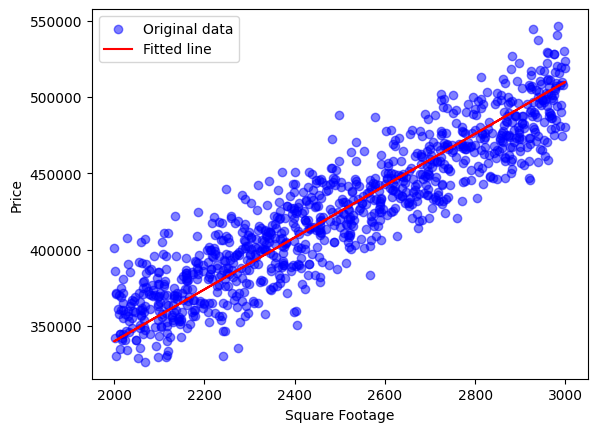

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate synthetic data
np.random.seed(0)
X = 2000 + 1000 * np.random.rand(1000)  # Square footage
true_beta_0 = 50000
true_beta_1 = 150
y = true_beta_0 + true_beta_1 * X + 20000 * np.random.randn(1000)  # Prices with noise

# Initialize parameters
beta_0 = 0
beta_1 = 0
alpha = 0.00000001  # Learning rate
iterations = 10000

m = len(y)  # Number of training examples

# Gradient Descent
for _ in range(iterations):
    y_pred = beta_0 + beta_1 * X
    error = y - y_pred
    beta_0 -= alpha * (-2 / m) * np.sum(error)
    beta_1 -= alpha * (-2 / m) * np.sum(error * X)

# Predictions after training
y_pred = beta_0 + beta_1 * X

# Calculating Mean Absolute Error (MAE)
MAE = mean_absolute_error(y, y_pred)

# Calculating Mean Squared Error (MSE)
MSE = mean_squared_error(y, y_pred)

# Calculating R-squared (R²)
R2 = r2_score(y, y_pred)

print(f"Final parameters: beta_0 = {beta_0}, beta_1 = {beta_1}")
print(f"Mean Absolute Error: {MAE}")
print(f"Mean Squared Error: {MSE}")
print(f"R-squared: {R2}")

# Plotting the results
plt.scatter(X, y, color='blue', label='Original data', alpha=0.5)
plt.plot(X, y_pred, color='red', label='Fitted line')
plt.xlabel('Square Footage')
plt.ylabel('Price')
plt.legend()
plt.show()


Original DataFrame:
     bedrooms  square_footage has_garage         price
0           5            2787         no  1.064534e+06
1           1            3352         no  7.783396e+05
2           4            2407         no  8.688698e+05
3           4            2674        yes  9.803306e+05
4           4            2348        yes  9.147049e+05
..        ...             ...        ...           ...
995         5            1637        yes  8.843700e+05
996         4            1557        yes  7.784356e+05
997         2            3333         no  8.743696e+05
998         2            1250         no  4.568579e+05
999         4            2179        yes  8.808889e+05

[1000 rows x 4 columns]
Preprocessed DataFrame:
     bedrooms  square_footage  has_garage         price
0    1.416391        0.314944           0  1.064534e+06
1   -1.427768        0.970869           0  7.783396e+05
2    0.705351       -0.126209           0  8.688698e+05
3    0.705351        0.183759           1  9.80

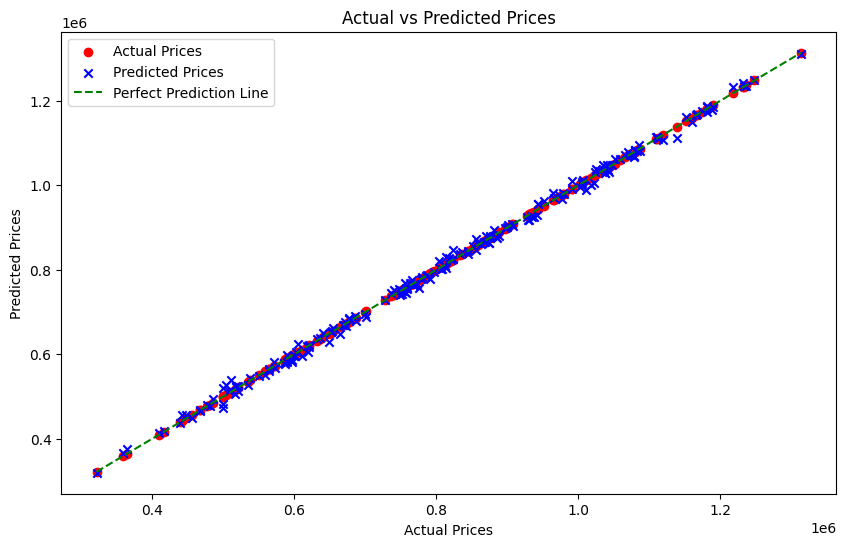

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Generate 1000 random data points
np.random.seed(0)
bedrooms = np.random.randint(1, 6, 1000)
square_footage = np.random.randint(1000, 4001, 1000)
has_garage = np.random.choice(['yes', 'no'], 1000)
price = 100000 * bedrooms + 200 * square_footage + 50000 * (has_garage == 'yes') + np.random.normal(0, 10000, 1000)

data = {
    'bedrooms': bedrooms,
    'square_footage': square_footage,
    'has_garage': has_garage,
    'price': price
}

df = pd.DataFrame(data)
print("Original DataFrame:")
print(df)

# Filling missing values with the mean of the column
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())

# Encoding 'has_garage' column to numerical values
df['has_garage'] = df['has_garage'].map({'yes': 1, 'no': 0})

# Standardizing the features
scaler = StandardScaler()
df[['bedrooms', 'square_footage']] = scaler.fit_transform(df[['bedrooms', 'square_footage']])
print("Preprocessed DataFrame:")
print(df)

# Splitting the data into training and testing sets
X = df[['bedrooms', 'square_footage', 'has_garage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
print("Predicted values:", y_pred)
print("Actual values:", y_test.values)

# Calculating metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Resetting index of y_test for alignment with y_pred
y_test_reset_index = y_test.reset_index(drop=True)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reset_index, y_test_reset_index, color='red', label='Actual Prices', marker='o')  # Plotting actual values
plt.scatter(y_test_reset_index, y_pred, color='blue', label='Predicted Prices', marker='x')  # Plotting predicted values
plt.plot([min(y_test_reset_index), max(y_test_reset_index)], [min(y_test_reset_index), max(y_test_reset_index)], color='green', linestyle='--', label='Perfect Prediction Line')

plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()



# find and handel outliers

- Residuals Calculation: Residuals are the differences between the actual values (y_test) and the predicted values (y_pred). This is computed as residuals = y_test - y_pred.

- Outlier Detection Criterion: Outliers are identified based on a threshold. In this case, the threshold is set to be three times the standard deviation of the residuals.

- Detecting Outliers: For each residual value, the code checks whether its absolute value exceeds the threshold (3 * np.std(residuals)). If the absolute value of the residual is greater than this threshold, the corresponding data point is considered an outlier. The np.abs() function is used to ensure that both positive and negative residuals are considered.

- Handling Outliers: Once the outliers are detected, you can choose to handle them in various ways. In the provided code snippet, outliers are identified by their index (outliers_index) in the y_test and y_pred arrays. These outliers are then removed from the test set and the corresponding actual values are removed from the y_test array, essentially creating a "cleaned" dataset.

- Re-training the Model: After removing the outliers, the model is re-trained using the cleaned dataset (X_clean, y_clean).

- Evaluation of Model Performance: Finally, the performance of the model is evaluated on the cleaned data to assess how well it performs without the outliers.

This approach is based on the assumption that outliers in the residuals represent data points where the model's predictions significantly deviate from the actual values. By detecting and handling these outliers, we aim to improve the model's performance and generalization capability. 

Mean Absolute Error: 12250.29175807207
Mean Squared Error: 2489849516.260407
R-squared: 0.9509677473720735


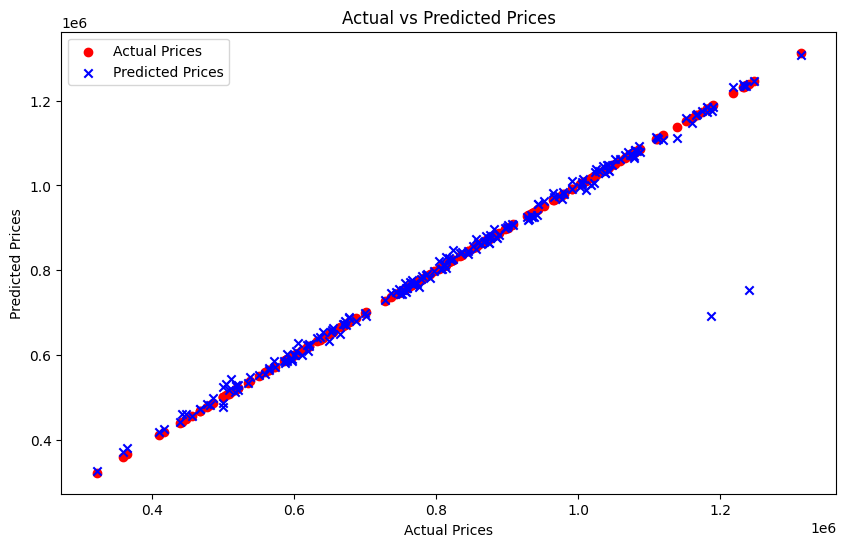

In [17]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.datasets import fetch_california_housing
# Generate 1000 random data points
np.random.seed(0)
bedrooms = np.random.randint(1, 6, 1000)
square_footage = np.random.randint(1000, 4001, 1000)
has_garage = np.random.choice(['yes', 'no'], 1000)
price = 100000 * bedrooms + 200 * square_footage + 50000 * (has_garage == 'yes') + np.random.normal(0, 10000, 1000)

# Introduce outliers
price[np.random.choice(1000, 5)] += 500000

data = {
    'bedrooms': bedrooms,
    'square_footage': square_footage,
    'has_garage': has_garage,
    'price': price
}

df = pd.DataFrame(data)
# print("Original DataFrame:")
# print(df)

# Filling missing values with the mean of the column
df['bedrooms'] = df['bedrooms'].fillna(df['bedrooms'].mean())

# Encoding 'has_garage' column to numerical values
df['has_garage'] = df['has_garage'].map({'yes': 1, 'no': 0})

# Standardizing the features
scaler = StandardScaler()
df[['bedrooms', 'square_footage']] = scaler.fit_transform(df[['bedrooms', 'square_footage']])
# print("Preprocessed DataFrame:")
# print(df)

# Splitting the data into training and testing sets
X = df[['bedrooms', 'square_footage', 'has_garage']]
y = df['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating and training the model
model = LinearRegression()
model.fit(X_train, y_train)

# Making predictions on the test set
y_pred = model.predict(X_test)
# print("Predicted values:", y_pred)
# print("Actual values:", y_test.values)

# Calculating metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Resetting index of y_test for alignment with y_pred
y_test_reset_index = y_test.reset_index(drop=True)

# Plotting actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test_reset_index, y_test_reset_index, color='red', label='Actual Prices', marker='o')  # Plotting actual values
plt.scatter(y_test_reset_index, y_pred, color='blue', label='Predicted Prices', marker='x')  # Plotting predicted values
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Prices')
plt.legend()
plt.show()



In [20]:
# Detecting outliers
residuals = y_test - y_pred
outliers_index = np.abs(residuals) > 3 * np.std(residuals)

# Handling outliers by removing them from the dataset
X_clean = X_test[~outliers_index]
y_clean = y_test[~outliers_index]

# Re-training the model with the cleaned dataset
model.fit(X_clean, y_clean)

# Making predictions on the cleaned test set
y_pred_clean = model.predict(X_clean)

# Calculating metrics on cleaned data
mae_clean = mean_absolute_error(y_clean, y_pred_clean)
mse_clean = mean_squared_error(y_clean, y_pred_clean)
r2_clean = r2_score(y_clean, y_pred_clean)

print("Metrics after handling outliers:")
print(f"Mean Absolute Error: {mae_clean}")
print(f"Mean Squared Error: {mse_clean}")
print(f"R-squared: {r2_clean}")


Metrics after handling outliers:
Mean Absolute Error: 7158.028582559069
Mean Squared Error: 82831511.92364702
R-squared: 0.998334383737222


In [21]:
housing=fetch_california_housing(as_frame=True)
housing=housing.frame
housing.head()
housing.value_counts

<bound method DataFrame.value_counts of        MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0      8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1      8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2      7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3      5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4      3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   
...       ...       ...       ...        ...         ...       ...       ...   
20635  1.5603      25.0  5.045455   1.133333       845.0  2.560606     39.48   
20636  2.5568      18.0  6.114035   1.315789       356.0  3.122807     39.49   
20637  1.7000      17.0  5.205543   1.120092      1007.0  2.325635     39.43   
20638  1.8672      18.0  5.329513   1.171920       741.0  2.123209     39.43   
20639  2.3886      16.0  5.254717   1.162264      1387.0  2.616981     39.37   


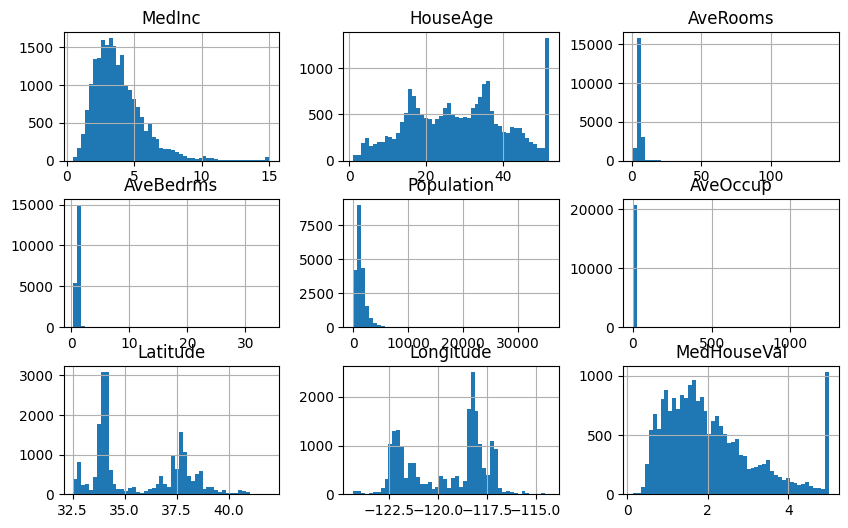

In [30]:
housing.hist(bins=50,figsize=(10,6))
plt.show()